# Introduction to Tensorflow Keras framework
Author: Sada Narayanappa

## Create python environment

An example of creating environment on your machine.

```
python -m venv ~/venv/py39

# You may your initialization file (ex: .bashrc) 
alias py39='source ~/venv/py39/bin/activate'
py39

# If you are using vscode, set the path in "Python: Venv Path" to ~/venv
```

In [ ]:
# !pip install tensorflow

In [42]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


# Keras Dense Layer

In the following cell, we will run a simple example and demonstrate what is a dense layer.
A dense layer with n1 inouts and n nodes will have n outputs. When we create it, by default it uses the bias.
In the following figure, can you guess the dimention of the weight matrix before you the run the cells?

<img width=128 src=../imgs/01_nn.png> 

In [49]:
from tensorflow.keras.layers import Dense 
import numpy as np

d = Dense(3, activation="linear", input_shape = (2,), use_bias=True, name="f")
x = np.array([[1,2]])
d(x)
d.weights
#d.get_weights()

[<tf.Variable 'f/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.35920477,  0.5748137 ,  0.66147137],
        [-0.8113628 , -0.15001965, -0.47378695]], dtype=float32)>,
 <tf.Variable 'f/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [47]:
w = np.array([[1 ,  2 , 3],
              [0,   1 ,  2]])
b = np.array([0.,0.,0.])

d.set_weights([w,b])
d.weights

[<tf.Variable 'f/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[1., 2., 3.],
        [0., 1., 2.]], dtype=float32)>,
 <tf.Variable 'f/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [48]:
d(x)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 4., 7.]], dtype=float32)>

# Sequential Model

In [91]:
model = tf.keras.models.Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

x = np.array([[1,2]])
model(x)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.74670917, 0.25329077]], dtype=float32)>

In [92]:
model.weights

[<tf.Variable 'dense_35/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.91458315, -0.11473131,  0.06211042],
        [ 0.9163935 , -0.3605268 ,  0.93070006]], dtype=float32)>,
 <tf.Variable 'dense_35/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_36/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.54584765, -0.6386249 ,  0.86395574],
        [-0.57457423, -0.95487   , -0.34045362],
        [ 0.34001708,  0.8085003 , -0.5467229 ]], dtype=float32)>,
 <tf.Variable 'dense_36/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_37/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[-0.6029743 , -1.0344017 ],
        [ 0.2904501 , -0.75747967],
        [-0.186337  , -0.7207972 ]], dtype=float32)>,
 <tf.Variable 'dense_37/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [93]:
model.layers
model.layers[0].weights

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 3)                 9         
                                                                 
 dense_36 (Dense)            (None, 3)                 12        
                                                                 
 dense_37 (Dense)            (None, 2)                 8         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


# Real example

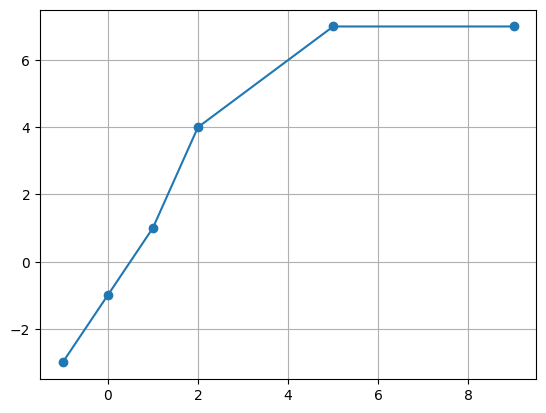

In [94]:
import matplotlib.pyplot as plt

model = tf.keras.Sequential()
model.add(Dense(units=3, activation="relu", input_shape=[1]))
model.add(Dense(units=1, activation="linear"))


model.compile(optimizer='sgd', loss='mean_squared_error')
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 5.0, 9.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 4.0, 7.0, 7.0], dtype=float)

plt.plot(xs,ys, marker='o')
plt.grid()

1/1 [==============================] - 0s 69ms/step


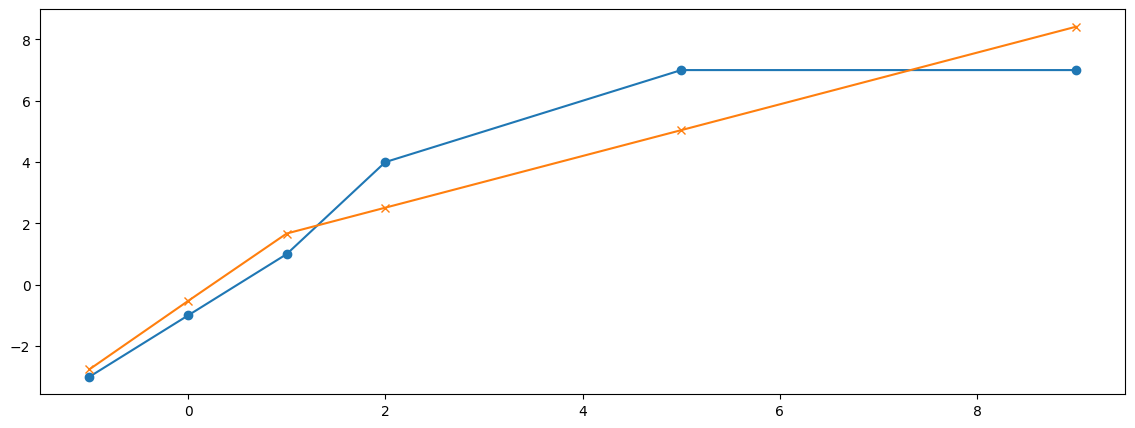

In [95]:
tfx = tf.data.Dataset.from_tensor_slices(xs)
tfy = tf.data.Dataset.from_tensor_slices(ys)

model.fit(xs, ys, epochs=250, verbose=False)
yh = model.predict(xs)

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

In [96]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 3)                 6         
                                                                 
 dense_39 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 26ms/step


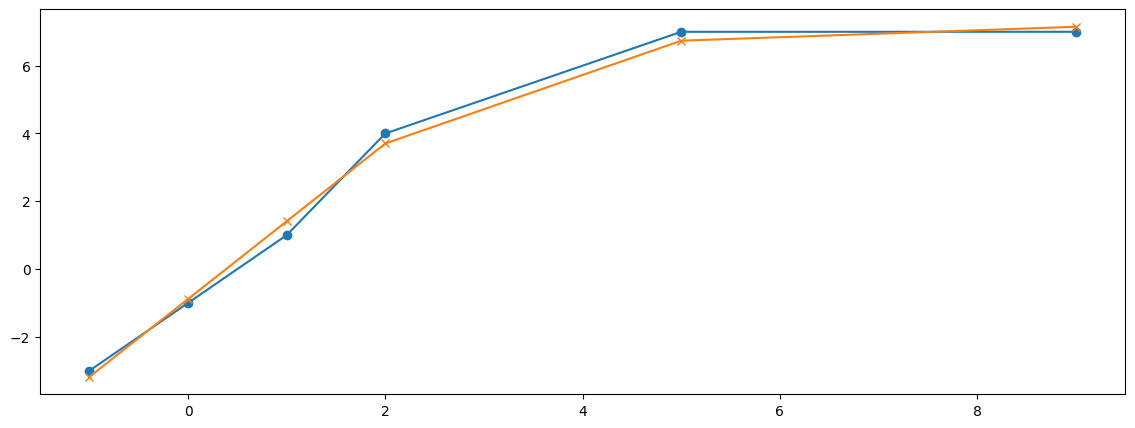

In [97]:
model.fit(xs, ys, epochs=250*4, verbose=False)
yh = model.predict(xs)

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

1/1 [==============================] - 0s 18ms/step


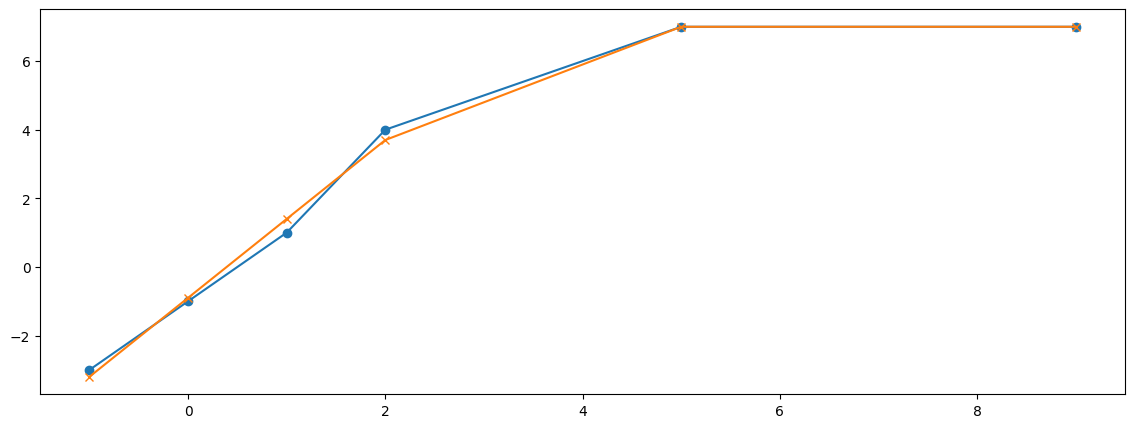

In [90]:
model.fit(xs, ys, epochs=250*10, verbose=False)
yh = model.predict(xs)

plt.figure(figsize=(14,5))
plt.plot(xs,ys, marker='o')
plt.plot(xs,yh, marker='x')

# References

To learn more, refer to:

- <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/" class="external">Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow</a>, 2nd Edition.
- <a href="https://www.tensorflow.org/tutorials/structured_data/time_series#multi-step_dense"> Time series analysis </a>

- <a href=https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352>Step-by-step understanding LSTM Autoencoder layers</a>

## The END